# Docstrings

The top of Python files should always be a short documentation about the
content of the file, or "docstring". Multiline comments are in Python indicated with tripple quotes ("""), 
single line comments with a hash (#).

This ipyton notebook is short demonstration of Python for scientific data analysis

This script covers the following points:

* Plotting a sine wave
* Generating a column matrix of data
* Writing data to a text-file, and reading data from a text-file
* Waiting for a button-press to continue the program exectution
* Using a dictionary, which is similar to MATLAB structures
* Extracting data which fulfill a certain condition
* Calculating the best-fit-line to noisy data
* Formatting text-output
* Calculating confidence intervals for line-fits
* Saving figures
* Pandas-demo

# Modules and Packages

In [1]:
"""In contrast to MATLAB, you explicitly have to load the modules that you need.
And don't worry here about not knowing the right modules: numpy, scipy, and
matplotlib are almost everything you will need most of the time, and you
will quickly get used to them.
And: you probably have to go back to a terminal, and install 'pingouin' with 
'pip install pingouin'!
"""
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pingouin as pg
# These abbreviations for numpy, scipy, matplotlib.pyplot and pingouin are very common!

# Pandas is mainly used for statistics and worksheet-like data
import pandas as pd

# Sine Wave

In [2]:
# Create a sine-wave
t = np.arange(0,10,0.1)
x = np.sin(t)

# Note: in contrast to MATLAB you have to specify where your commands come from
# (unless you used "from xxx import *"

# Save the data in a text-file, in column form
outFile = 'test.txt'
np.savetxt(outFile, np.column_stack((t,x)))

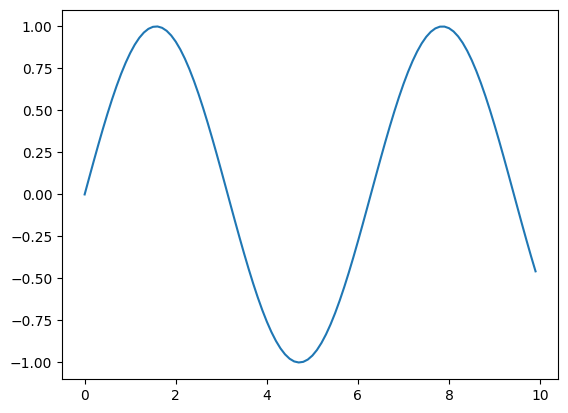

In [3]:
# Read the data into a different variable
inData = np.loadtxt(outFile)
t2 = inData[:,0] # Note that Python starts at "0"!
x2 = inData[:,1] # Python uses "[]" for indices, and "()" for functions
x_cos = np.cos(t2)

# Plot the data, and wait for the user to click
plt.plot(t2,x2)
#plt.plot(t2, x_cos)
plt.show()

# Noisy Data and Linefits

Fit the following function: 
$y = k*x + d$

In [4]:
# Generate a noisy line
t = np.arange(-100,100)
# use a Python "dictionary" for named variables
par = {'offset':100, 'slope':0.5, 'noiseAmp':4}
x = par['offset'] + par['slope']*t + par['noiseAmp']*np.random.randn(len(t))

Text(0, 0.5, 'Values')

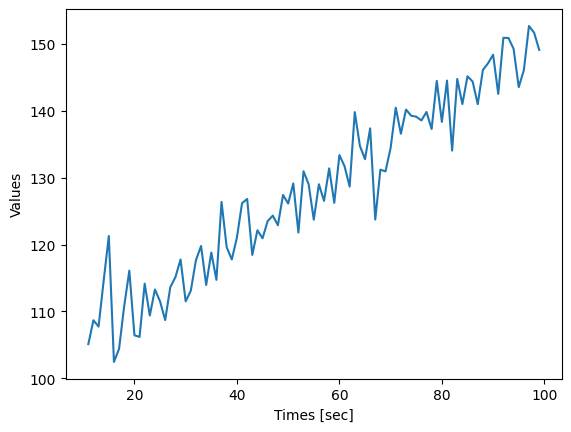

In [5]:
# Select "late" values, i.e. with t>10:
# binary indexing works in Python
x_high = x[t>10]
t_high = t[t>10]

# Plot the "late" data
plt.close()
plt.plot(t_high, x_high)
plt.xlabel('Times [sec]')
plt.ylabel('Values')

In [6]:
linear_fit = pg.linear_regression(t_high, x_high)
print(linear_fit.round(2))

       names    coef    se       T  pval    r2  adj_r2  CI[2.5%]  CI[97.5%]
0  Intercept  100.71  0.93  108.05   0.0  0.92    0.92     98.85     102.56
1         x1    0.50  0.02   32.61   0.0  0.92    0.92      0.47       0.53


In [7]:
# Get the coefficients and fit the line
p = list(linear_fit.coef)
p.reverse()
x_fit = np.polyval(p, t_high)

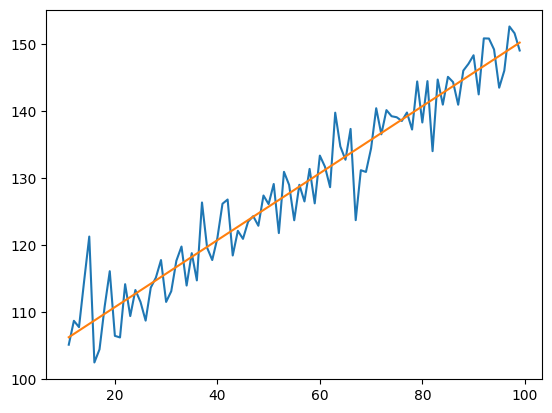

In [8]:
# Plot data, with fit superposed
plt.plot(t_high, x_high)
plt.plot(t_high, x_fit)